# Silver v. Gold
---

Study into the relationship between gold and silver commodities in comparison to US broad equities (S&P500). Emphasis is placed on what separates and correlates commodities prices. Ideally, a diversified portfolio of bullion can be constructed that leverages the strengths of individual precious metals.

---

## <a name="toc"></a> Table of Contents
1. [Visualization](#visualization)
2. [Risk Return Analysis](#risk-return-analysis)



In [1]:
# -------------------- LOAD DEPENDENCIES -------------------- #

%reset -f
import scipy
import seaborn
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
# -------------------- LOAD HISTORICAL DATA -------------------- #

# Read CSV files into dataframes
GSPC = pd.read_csv('data/^GSPC.csv')
GOLD = pd.read_csv('data/GOLD.csv')
SILV = pd.read_csv('data/SILV.csv')



In [3]:
# -------------------- DATA CLEANSING -------------------- #

# Drop null records
GSPC.dropna(inplace=True)
GOLD.dropna(inplace=True)
SILV.dropna(inplace=True)

# Convert string dates to datetime objects
GSPC['Date'] = GSPC['Date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%y')).dt.date
GOLD['Date'] = GOLD['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')).dt.date
SILV['Date'] = SILV['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')).dt.date

# Reverse the GSPC dates and reset indices
GSPC = GSPC.iloc[::-1]
GSPC.reset_index(inplace=True, drop=True)



In [4]:
# -------------------- RECONCILE DATES -------------------- #

# Inner join GSPC and SILV
GSPC_SILV = pd.merge(left=GSPC[['Date', 'Close']], left_on='Date',
         right=SILV[['Date', 'Adj Close']], right_on='Date')

# Inner join Portfolio and GOLD
Portfolio = pd.merge(left=GSPC_SILV[['Date', 'Close', 'Adj Close']], left_on='Date',
         right=GOLD[['Date', 'Adj Close']], right_on='Date',
         suffixes=(" SILV", " GOLD"))

# Rename the final columns
Portfolio.rename(inplace=True,
                 columns={"Close": "GSPC",
                          "Adj Close SILV": "SILV",
                          "Adj Close GOLD": "GOLD"})

Portfolio.head(4)

,Date,GSPC,SILV,GOLD
0,2000-08-30,1502.59,4.930,273.899994
1,2000-08-31,1517.68,5.003,278.299988
2,2000-09-01,1520.77,5.004,277.000000
3,2000-09-05,1507.08,4.998,275.799988


In [5]:
# -------------------- FIND DAILY ROR -------------------- #

Portfolio["GSPC Daily Return"] = Portfolio["GSPC"].shift(1) / Portfolio["GSPC"] - 1
Portfolio["SILV Daily Return"] = Portfolio["SILV"].shift(1) / Portfolio["SILV"] - 1
Portfolio["GOLD Daily Return"] = Portfolio["GOLD"].shift(1) / Portfolio["GOLD"] - 1

Portfolio.head(4)

,Date,GSPC,SILV,GOLD,GSPC Daily Return,SILV Daily Return,GOLD Daily Return
0,2000-08-30,1502.59,4.930,273.899994,NaN,NaN,NaN
1,2000-08-31,1517.68,5.003,278.299988,-0.009943,-0.014591,-0.015810
2,2000-09-01,1520.77,5.004,277.000000,-0.002032,-0.000200,0.004693
3,2000-09-05,1507.08,4.998,275.799988,0.009084,0.001200,0.004351


In [6]:
# -------------------- FIND CUMULATIVE RETURNS -------------------- #

Portfolio["GSPC Cum. Return"] = Portfolio["GSPC Daily Return"]
Portfolio["SILV Cum. Return"] = Portfolio["SILV Daily Return"]
Portfolio["GOLD Cum. Return"] = Portfolio["GOLD Daily Return"]

Portfolio["GSPC Cum. Return"] += 1
Portfolio["SILV Cum. Return"] += 1
Portfolio["GOLD Cum. Return"] += 1

Portfolio.head(4)

,Date,GSPC,SILV,GOLD,GSPC Daily Return,SILV Daily Return,GOLD Daily Return,GSPC Cum. Return,SILV Cum. Return,GOLD Cum. Return
0,2000-08-30,1502.59,4.930,273.899994,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-31,1517.68,5.003,278.299988,-0.009943,-0.014591,-0.015810,0.990057,0.985409,0.984190
2,2000-09-01,1520.77,5.004,277.000000,-0.002032,-0.000200,0.004693,0.997968,0.999800,1.004693
3,2000-09-05,1507.08,4.998,275.799988,0.009084,0.001200,0.004351,1.009084,1.001200,1.004351


## <a name="visualization"></a> [Visualization](#toc)

How have gold and silver performed relative to each other and relative to the S&P 500 index (^GSPC)?



In [7]:
# -------------------- NORMALIZE CLOSE -------------------- #

def normalize(df):
    minima = df[0]
    maxima = df.max()
    return (df - minima) / (maxima - minima)

# Create normalized close price column
Normalized = pd.DataFrame()
Normalized['Date'] = Portfolio['Date']
Normalized['GSPC'] = normalize(Portfolio['GSPC'])
Normalized['SILV'] = normalize(Portfolio['SILV'])
Normalized['GOLD'] = normalize(Portfolio['GOLD'])

Normalized.head(4)

,Date,GSPC,SILV,GOLD
0,2000-08-30,0.000000,0.000000,0.000000
1,2000-08-31,0.005620,0.001672,0.002475
2,2000-09-01,0.006771,0.001695,0.001744
3,2000-09-05,0.001672,0.001558,0.001069


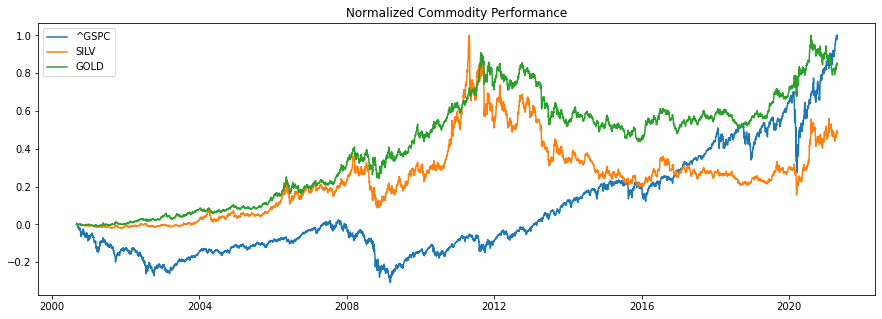

In [8]:
# -------------------- NORMALIZED GRAPH -------------------- #

startdate = dt.datetime(2000, 8, 28)
enddate = dt.datetime(2021, 4, 26)

plt.figure(figsize=(15,5))
plt.title('Normalized Commodity Performance')
plt.plot(Normalized['Date'], Normalized['GSPC'])
plt.plot(Normalized['Date'], Normalized['SILV'])
plt.plot(Normalized['Date'], Normalized['GOLD'])
plt.legend(["^GSPC", "SILV", "GOLD"]);


Sharp declines in index performance appear to correlate with sharp declines in the strike price of silver but not with gold. In other words, although gold and silver appear to be strongly correlated, gold appears to offer better protections against market-wide volatility.

## <a name="risk-return-analysis"></a> [Risk Return Analysis](#toc)

How do the volatilities of silver and gold compare to the market as a whole? ($\beta$)
How well do silver and gold perform with respect to the market? ($\alpha$) <br>

Beta is an assessment of the volatility of an asset with respect to the market.
- $\beta < 1$ indicates asset is **less** volatile than the market
- $\beta = 1$ indicates asset is **as** volatile as the market
- $\beta > 1$ indicates asset is **more** volatile than that market

Beta can be expressed as the coefficient of the line of best fit whereas the alpha can be found in the same equation as the intercept (or the $x^0$ coefficient if you want to be *that* pedantic). Let $R_i$ represent the historical daily returns of an investment and $R_m$ represent the historical daily returns of a broad market index such as S&P 500 or the Russell 5000. Then the beta can be expressed like so:

$$
R_i = \beta \cdot R_m + \alpha
$$

The issue with the approach above lies in the fact that uncorrelated assets will yield meaningless linear regressions, as measured by a low ($<< 1$) $R^2$ value. Luckily, the beta can be found using alternative statistical methods, such as the covariance of the stock against the market when controlling for the variance of the stock itself:

$$
\beta = \frac{\text{cov}\left( R_i, R_m \right)}{\text{var}\left( R_m \right)}
$$

Similarly, the alpha can be expressed arithmetically as the expected return of an investment $R_i$ in excess of the expected market return $R_m$ less the risk-free rate of return $R_f$* and with respect to the excess risk of the investment $\beta_i$. See below:

$$
\alpha = \left( R_i \cdot \left( R_f + \beta_i \cdot \left( R_m - R_f \right) \right) \right)
$$

\* typically 10+ year US treasury bond or the prime rate set by the US Federal Reserve.



y=-0.0169x+-0.0001
r-squared: 0.0002


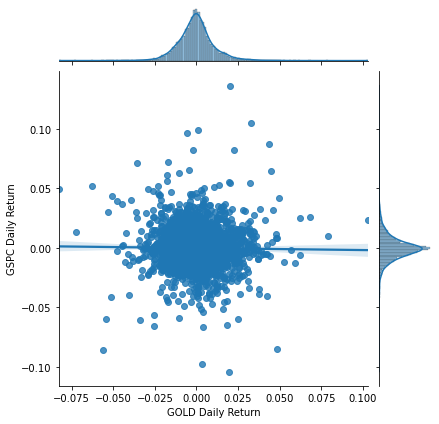

In [9]:
# -------------------- GOLD V GSPC -------------------- #

def plot_correlation(data, x, y):
    m, b, r, p, se = scipy.stats.linregress(data[x][1::].values, data[y][1::].values)
    seaborn.jointplot(data=data, x=x, y=y, kind="reg");
    return m, b, r, p, se

x = "GOLD Daily Return"
y = "GSPC Daily Return"
beta, alpha, r, _, _ = plot_correlation(data=Portfolio, x=x, y=y)

print(f"y={round(beta, 4)}x+{round(alpha, 4)}")
print(f"r-squared: {round(r**2, 4)}")

y=0.0661x+-0.0001
r-squared: 0.0114


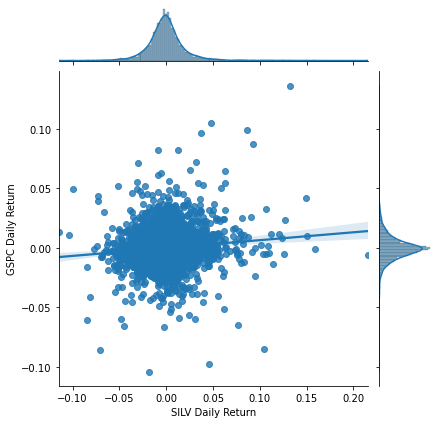

In [10]:
# -------------------- SILV V GSPC -------------------- #

def plot_correlation(data, x, y):
    m, b, r, p, se = scipy.stats.linregress(data[x][1::].values, data[y][1::].values)
    seaborn.jointplot(data=data, x=x, y=y, kind="reg");
    return m, b, r, p, se

x = "SILV Daily Return"
y = "GSPC Daily Return"
beta, alpha, r, _, _ = plot_correlation(data=Portfolio, x=x, y=y)

print(f"y={round(beta, 4)}x+{round(alpha, 4)}")
print(f"r-squared: {round(r**2, 4)}")

y=1.4127x+0.0003
r-squared: 0.6098


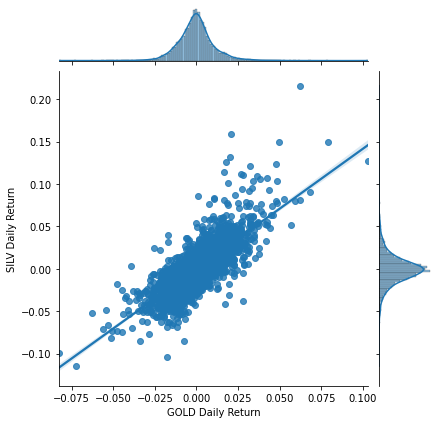

In [11]:
# -------------------- GOLD V SILV -------------------- #

def plot_correlation(data, x, y):
    m, b, r, p, se = scipy.stats.linregress(data[x][1::].values, data[y][1::].values)
    seaborn.jointplot(data=data, x=x, y=y, kind="reg");
    return m, b, r, p, se

x = "GOLD Daily Return"
y = "SILV Daily Return"
beta, alpha, r, _, _ = plot_correlation(data=Portfolio, x=x, y=y)

print(f"y={round(beta, 4)}x+{round(alpha, 4)}")
print(f"r-squared: {round(r**2, 4)}")

Weirdly enough, the returns for neither gold nor silver are correlated with the broader market.* Consequently, beta assessments cannot be completed through linear regression. However, gold and silver are correlated with each other and suggest that silver is the more volatile of the two commodities since $\beta = 1.4127 > 1$. This silver volaility could be attributed to the lower relative price of silver against gold. Silver is easier to buy and to sell and therefore one could expect a larger volume of trades to be placed for the commodity. The resulting liquidity is a possitive for the investor but also encourages a greater degree of short-term trading and speculation, leading to price swings that don't accurate reflect changes in the underlying value of the asset. Just my guess, let's check it out.



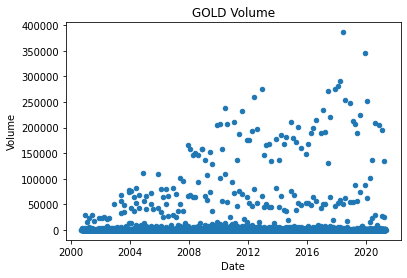

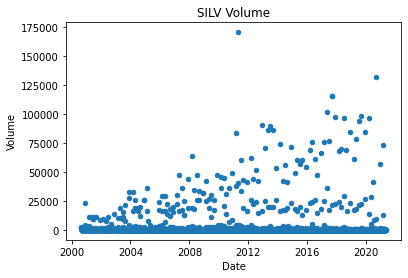

In [12]:
GOLD_VOL = GOLD[["Date", "Volume"]]
SILV_VOL = SILV[["Date", "Volume"]]

GOLD_VOL.replace(to_replace=0, value=np.nan, inplace=True)
GOLD_VOL.dropna(axis=0, inplace=True)

SILV_VOL.replace(to_replace=0, value=np.nan, inplace=True)
SILV_VOL.dropna(axis=0, inplace=True)

GOLD_VOL.plot(x="Date", y="Volume", kind="scatter", title="GOLD Volume");
SILV_VOL.plot(x="Date", y="Volume", kind="scatter", title="SILV Volume");


In [13]:

Normalized['GOLD Volume'] = normalize(GOLD['Volume'])
Normalized['SILV Volume'] = normalize(SILV['Volume'])

pd.DataFrame(data={"Volume Mean": [int(GOLD_VOL['Volume'].mean()), int(SILV_VOL['Volume'].mean())],
                   "Norm. Volume STD": [round(Normalized['GOLD Volume'].std(), 4)*100, round(Normalized['SILV Volume'].std(), 4)*100],
                   "Norm. Volume Var": [round(Normalized['GOLD Volume'].var(), 4)*100, round(Normalized['SILV Volume'].var(), 4)*100],
                   "Daily Return STD": [round(Portfolio['GOLD Daily Return'].std(), 4)*100, round(Portfolio['SILV Daily Return'].std(), 4)*100],
                   "Daily Return Var": [round(Portfolio['GOLD Daily Return'].var(), 4)*100, round(Portfolio['SILV Daily Return'].var(), 4)*100]},
             index=["GOLD", "SILV"])



,Volume Mean,Norm. Volume STD,Norm. Volume Var,Daily Return STD,Daily Return Var
GOLD,4628,6.33,0.40,1.12,0.01
SILV,1675,5.09,0.26,2.02,0.04


The quantity of low trade volume days in this data strongly arouses my suspicion. Nonetheless, it is clear that gold is the more popular of the two commodities from the perspective of their average daily trading volumes. When examining the standard deviations of their returns and volumes after normalizing the data for comparison, gold actually appears to have a higher volume volitility but greater price stability when compared to silver. Ergo, I reject my previous claim that liquidity could contribute to greater volatility in the underlying asset since, if this hypothesis were true, we would expect high volume volatility in silver when compared against gold.

Options chains provide another route for testing this hypothesis. The volume of options purchased close to the expiration date of the contract could be compared to see the relative speculative interest in each commodity. 

After seeing the above correlations, I have a better understanding of these assets. A diversified portfolio of precious metals commodities ought to offer a reasonable rate of return while also hedging against market risk.


*Alice Seaborn. APR 28. 2021.*